In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
ds = pd.read_csv('organics_stats.csv', index_col=0)

In [3]:
ds.head()

,Gender,Geographic Region,Loyalty Status,Neighborhood Cluster-7 Level,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,0,0,2,3,5,70,8,1,1,0.02
1,1,0,3,5,10,65,7,1,1,0.01
2,0,0,3,0,11,68,8,0,0,0.01
3,0,0,3,0,11,74,8,0,0,0.01
4,1,1,3,3,13,62,5,0,0,0.01


In [4]:
sample = pd.read_csv('sample.csv', index_col=0)

In [5]:
sample.head()

,Name,Gender,Age,Location,Neighborhood level,For how long do you have your loyalty card (in months)?,What's your loyalty card status?,How many days do you shop per month?
0,Ana Frias,0,32,1,1,0,2,16
1,Ana Horta,0,31,0,2,0,2,5
2,Beatriz Renault,0,33,1,1,12,3,6
3,Carlos Madriz,1,28,1,1,0,3,16
4,Cristina Zappullo,0,35,1,2,0,3,3


#### Scalling Data

In [6]:
X = ds.drop(columns=['Organics Purchase Count', 'Organics Purchase Indicator', 'Total Spend'])
y = ds['Organics Purchase Indicator']

X_sample = sample.drop(columns=['Name'])

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_sample = scaler.fit_transform(X_sample)

#### Splitting Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=29)

#### Decision Tree

In [9]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_sample = dtc.predict(X_sample)
y_sample

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [10]:
organic = pd.DataFrame(y_sample, columns=['Buy Organic'])
organic.head()

,Buy Organic
0,0
1,0
2,0
3,0
4,0


In [11]:
final = pd.concat([sample, organic], axis=1)
final.head()

,Name,Gender,Age,Location,Neighborhood level,For how long do you have your loyalty card (in months)?,What's your loyalty card status?,How many days do you shop per month?,Buy Organic
0,Ana Frias,0,32,1,1,0,2,16,0
1,Ana Horta,0,31,0,2,0,2,5,0
2,Beatriz Renault,0,33,1,1,12,3,6,0
3,Carlos Madriz,1,28,1,1,0,3,16,0
4,Cristina Zappullo,0,35,1,2,0,3,3,0


In [12]:
final = final[['Name','Buy Organic']]
final

,Name,Buy Organic
0,Ana Frias,0
1,Ana Horta,0
2,Beatriz Renault,0
3,Carlos Madriz,0
4,Cristina Zappullo,0
5,Duarte Cruz,0
6,Elvira Hanni,0
7,Filipe Koch,0
8,Gabriela Scatena,0
9,João Eira,1


In [13]:
final['Buy Organic'].value_counts(normalize=True)

0    0.636364
1    0.363636
Name: Buy Organic, dtype: float64

In [16]:
pie = pd.DataFrame({'Organic':[0,1], 'Percentage':[0.636364,0.363636]})
pie

,Organic,Percentage
0,0,0.636364
1,1,0.363636


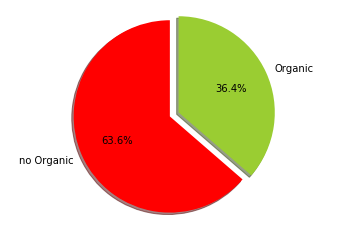

In [37]:
plt.pie(pie['Percentage'], explode=(0,0.1), labels=['no Organic','Organic'], autopct='%1.1f%%', colors=('r','yellowgreen'), shadow=True, startangle=90)
plt.axis('equal')
plt.show()